## STA302 Final Project ##

In [4]:
library(UsingR)
library(scatterplot3d)
library(xtable)
library(car)
library(Matrix)
library(MPV)



In [5]:
rm(list = ls())
# setwd("~/Dropbox/UofT Admin and TA/STA 302/Lectures/Final Project")


library(NHANES)
library(tidyverse)
library(glmnet)
library(rms)

small.nhanes <- na.omit(NHANES[NHANES$SurveyYr=="2011_12"
                               & NHANES$Age > 17,c(1,3,4,8:11,13,17,20,21,25,46,50,51,52,61)])
small.nhanes <- as.data.frame(small.nhanes %>%
  group_by(ID) %>% filter(row_number()==1) )
# nrow(small.nhanes)

## Checking whether there are any ID that was repeated. If not ##
## then length(unique(small.nhanes$ID)) and nrow(small.nhanes) are same ##
# length(unique(small.nhanes$ID))

## Create training and test set ##
set.seed(1003998757)
train <- small.nhanes[sample(seq_len(nrow(small.nhanes)), size = 400),]
# nrow(train)
length(which(small.nhanes$ID %in% train$ID))
test <- small.nhanes[!small.nhanes$ID %in% train$ID,]
# nrow(test)

[1] 400

not limited to):
• Model Diagnostics
• Checking for the variance inflation factor (VIF)
• Variable selection ---> model selection
• Shrinkage methods ---> LASSO 
• Model Validation


• Checking the prediction error on the test set after applying various model selection techniques
• After selecting the best model interpret and explain the parameter estimates
• Conclude on the effect of predictors on the combined systolic blood pressure readin

In [6]:
## Running the model ##
### First fit a multiple linear regression ##
model.lm <- lm(BPSysAve ~ ., data = train[, -c(1)])
summary(model.lm)


Call:
lm(formula = BPSysAve ~ ., data = train[, -c(1)])

Residuals:
    Min      1Q  Median      3Q     Max 
-36.653 -10.108  -1.269   9.552  69.049 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               195.31152   67.12715   2.910  0.00384 ** 
Gendermale                  4.06058    2.43465   1.668  0.09621 .  
Age                         0.53846    0.06484   8.304 2.03e-15 ***
Race3Black                  7.48535    5.73519   1.305  0.19267    
Race3Hispanic               4.06378    6.16467   0.659  0.51018    
Race3Mexican                3.55583    5.89748   0.603  0.54693    
Race3White                  0.97877    5.25457   0.186  0.85234    
Race3Other                 -3.18834    6.83469  -0.466  0.64114    
Education9 - 11th Grade     1.50893    3.77297   0.400  0.68944    
EducationHigh School       -2.51853    3.52145  -0.715  0.47495    
EducationSome College      -1.05749    3.58732  -0.295  0.76833    
EducationCollege G

## Model Diagnostics ##

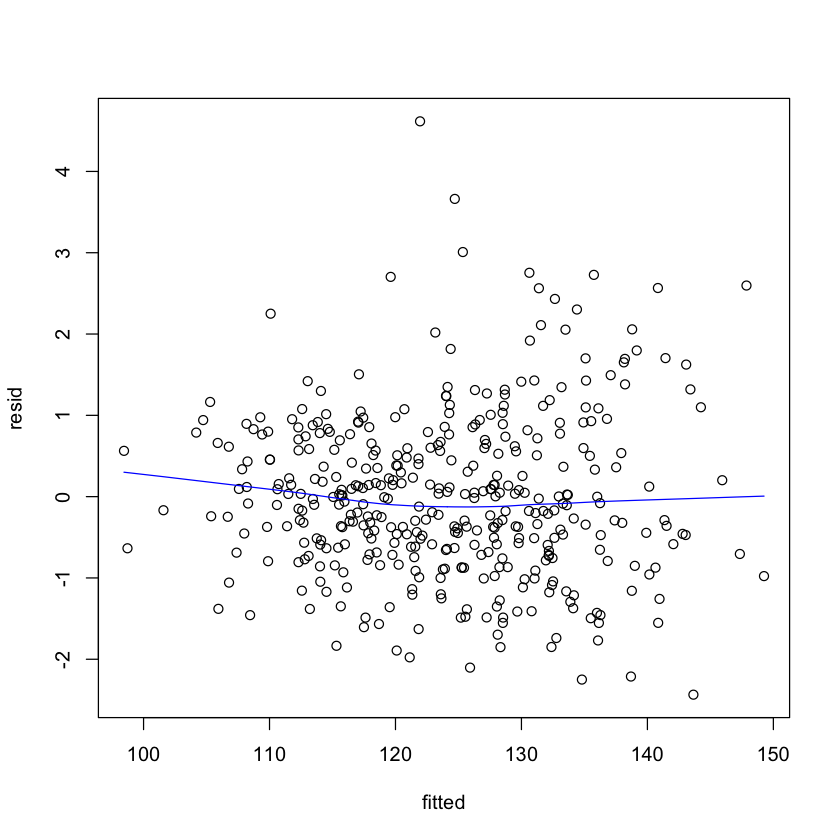

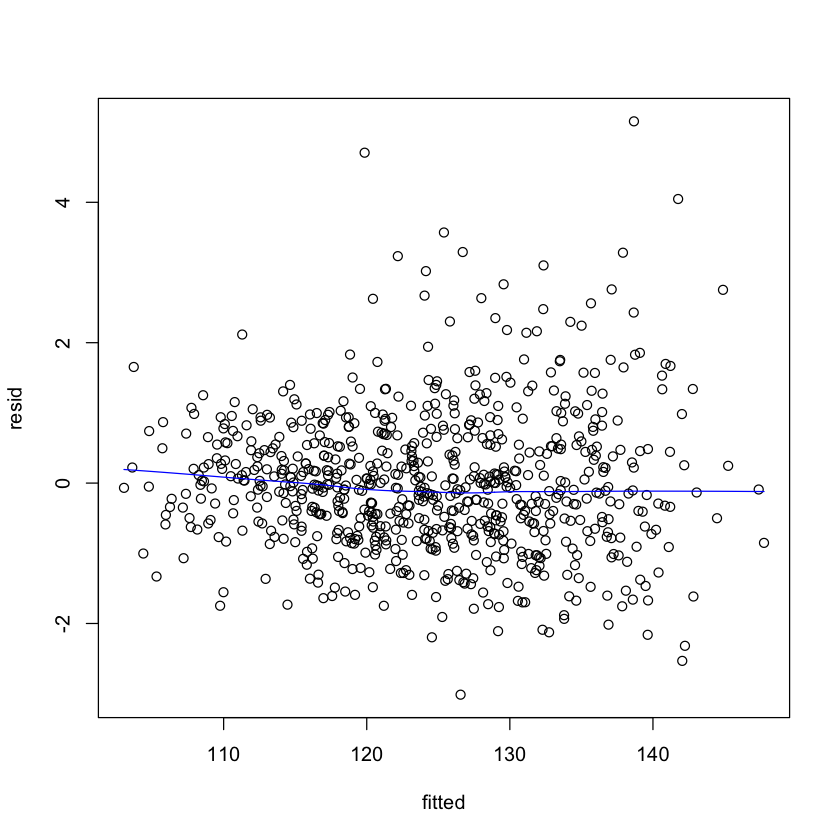

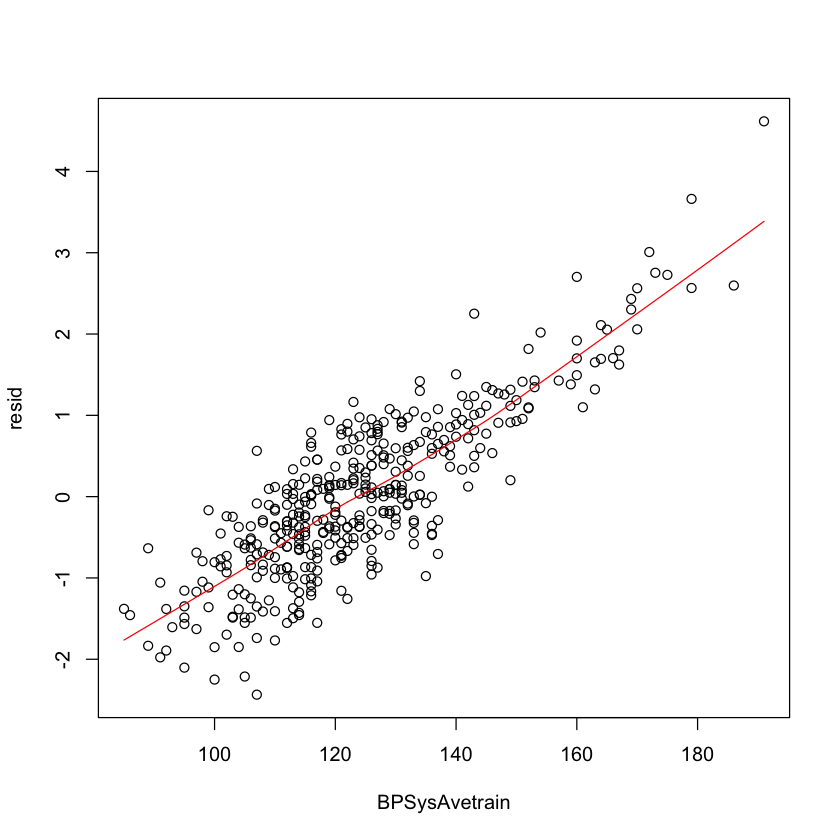

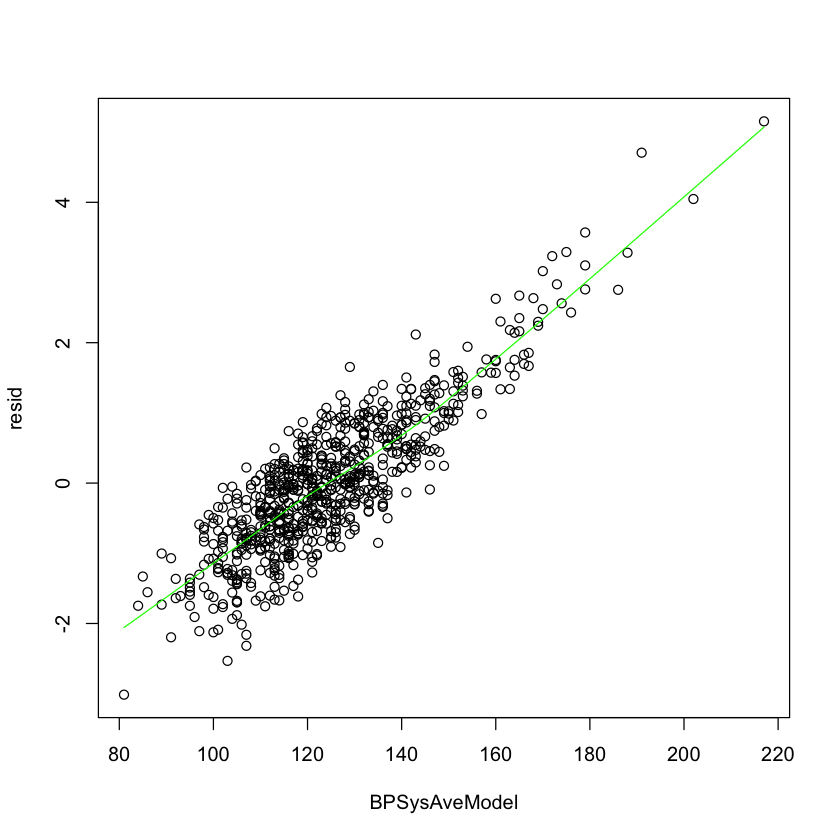

In [7]:
# ## Simulation for predictors ##

# # This following function provides a data set with p+1 columns #
# gendata <- function(n, p){
#   Xmat <- matrix(runif(n*p, 0, 1), nrow = n, ncol = p)
#   Y <- 4*( (sin(pi*Xmat[,1]*Xmat[,2])) + 8*(Xmat[,3] - 0.5)^3 +
#               1.5*Xmat[,4] - Xmat[,5] - 0.77    ) + rnorm(n, 0, 1)
#   dat <- cbind(Xmat, Y)
#   return(dat)
# }

# set.seed(1003998757)
# dat <- as.data.frame(gendata(400, 5))  # 400 simulations
# colnames(dat) <- c(paste0("X", 1:5), "Y")
# # head(dat)

# model <- lm(dat$Y ~ ., data = dat)
# head(model.matrix(model.lm))

# resid vs fitted train
resid <- rstudent(model.lm)
fitted <- predict(model.lm)
plot(resid~fitted)
lines(lowess(fitted, resid), col = "blue")

# resid vs fitted train entire
resid <- rstudent(lm(small.nhanes$BPSysAve~., data = small.nhanes[, -c(1)]))
fitted <- predict(lm(small.nhanes$BPSysAve~., data = small.nhanes[, -c(1)]))
plot(resid~fitted)
lines(lowess(fitted, resid), col = "blue")





# resid vs bpsys on training set
resid <- rstudent(lm(train$BPSysAve~., data = train[, -c(1)]))
BPSysAvetrain <- train$BPSysAve
plot(resid~BPSysAvetrain)
lines(lowess(BPSysAvetrain, resid), col = "red")


# resid vs bpsys entire model 
resid <- rstudent(lm(small.nhanes$BPSysAve~., data = small.nhanes[, -c(1)]))
BPSysAveModel <- small.nhanes$BPSysAve
plot(resid~BPSysAveModel)
lines(lowess(BPSysAveModel, resid), col = "green")


# plot(dat[,6]~fitted)
# lines(lowess(fitted, dat[,6]), col = "blue")
# mmm <- lm (dat[,6] ~ fitted)
# abline(mmm, col='red')

In [8]:
# leverage bs
h <- hatvalues(model.lm)
# print
thresh <- (2 * dim(model.matrix(model.lm))[2]) / nrow( train[, -c(1)])
w <- which(h>thresh)

print('Leverages:')
print(w)



### The Influential Observations ####
D <- cooks.distance(model.lm)
# p = 6 since 5 samples + 1
# n - p - 1 -> 4 params
which(D > qf(0.5, 39, 400))

print('Influentials:')
print(which(D > qf(0.5, 39, 400))
)



# ## DFFITS ##
print('Dfits:')
dfits <- dffits(model.lm)
which(abs(dfits) > 2*sqrt(39/nrow(train)))

## DFBETAS ##
print('DFbetas:')
dfb <- dfbetas(model.lm)
which(abs(dfb[,1]) > 2/sqrt(nrow(train)))


[1] "Leverages:"
310  30 367 630 619 593 275 569  94 531 
 16  56  78 215 220 268 286 302 335 366 


named integer(0)

[1] "Influentials:"
named integer(0)
[1] "Dfits:"


598 300 108 437 610 332  50 522 171 662 225 209 161 619 688 315 167 444 126 625 
 35  40  54  76  81  91 110 128 135 138 170 177 208 220 236 243 295 308 311 325 
 94 231 281 314 
335 340 357 369

[1] "DFbetas:"


571 664 598 108  30  91 437 332 131 669 209 122 399  43 161 245 688 315 704 373 
 29  33  35  54  56  60  76  91 112 131 177 181 189 190 208 228 236 243 257 283 
167 126 625 239 281  47 
295 311 325 332 357 380

## VIF ##

In [9]:
vif(model.lm)

Gendermale                       Age                Race3Black 
                 2.296381                  1.965802                  5.245430 
            Race3Hispanic              Race3Mexican                Race3White 
                 3.358476                  4.125130                  9.414060 
               Race3Other   Education9 - 11th Grade      EducationHigh School 
                 2.472166                  2.765322                  3.667422 
    EducationSome College     EducationCollege Grad  MaritalStatusLivePartner 
                 4.405782                  3.774110                  1.957057 
     MaritalStatusMarried MaritalStatusNeverMarried    MaritalStatusSeparated 
                 2.948636                  2.555408                  1.216306 
     MaritalStatusWidowed        HHIncome 5000-9999       HHIncome10000-14999 
                 1.847044                  2.407918                  3.745674 
      HHIncome15000-19999       HHIncome20000-24999       HHIncome25000-34999 
                 3.880098                  4.264833                  5.137110 
      HHIncome35000-44999       HHIncome45000-54999       HHIncome55000-64999 
                 5.608572                  4.993248                  4.939448 
      HHIncome65000-74999       HHIncome75000-99999        HHIncomemore 99999 
                 4.601489                  5.924683                 12.909069 
                  Poverty                    Weight                    Height 
                 6.044740                102.209153                 22.635754 
                      BMI          DepressedSeveral             DepressedMost 
                88.682723                  1.145326                  1.219297 
            SleepHrsNight           SleepTroubleYes             PhysActiveYes 
                 1.201826                  1.268687                  1.317050 
              SmokeNowYes 
                 1.396321

A VIF between 5 and 10 indicates high correlation that may be problematic. And if the VIF goes above 10, you can assume that the regression coefficients are poorly estimated due to multicollinearity.

## Variable Selection (Model Selection) ##

In [10]:
## Step wise regression ###

### First fit a multiple linear regression ##
## Based on AIC ##
# model.lm <- lm(lpsa ~ ., data = train[, -c(1)])
summary(model.lm)  
n <- nrow(train)
sel.var.aic <- step(model.lm, trace = 0, k = 2, direction = "both") 
sel.var.aic<-attr(terms(sel.var.aic), "term.labels")   
sel.var.aic


Call:
lm(formula = BPSysAve ~ ., data = train[, -c(1)])

Residuals:
    Min      1Q  Median      3Q     Max 
-36.653 -10.108  -1.269   9.552  69.049 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               195.31152   67.12715   2.910  0.00384 ** 
Gendermale                  4.06058    2.43465   1.668  0.09621 .  
Age                         0.53846    0.06484   8.304 2.03e-15 ***
Race3Black                  7.48535    5.73519   1.305  0.19267    
Race3Hispanic               4.06378    6.16467   0.659  0.51018    
Race3Mexican                3.55583    5.89748   0.603  0.54693    
Race3White                  0.97877    5.25457   0.186  0.85234    
Race3Other                 -3.18834    6.83469  -0.466  0.64114    
Education9 - 11th Grade     1.50893    3.77297   0.400  0.68944    
EducationHigh School       -2.51853    3.52145  -0.715  0.47495    
EducationSome College      -1.05749    3.58732  -0.295  0.76833    
EducationCollege G

[1] "Gender"  "Age"     "Poverty" "Height"

In [11]:
# bic 

## Step wise regression ###

### First fit a multiple linear regression ##
## Based on AIC ##
# model.lm <- lm(lpsa ~ ., data = train[, -c(1)])
summary(model.lm)  
n <- nrow(train)
sel.var.bic <- step(model.lm, trace = 0, k = log(nrow(train)), direction = "both") 
sel.var.bic<-attr(terms(sel.var.bic), "term.labels")   
sel.var.bic


Call:
lm(formula = BPSysAve ~ ., data = train[, -c(1)])

Residuals:
    Min      1Q  Median      3Q     Max 
-36.653 -10.108  -1.269   9.552  69.049 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               195.31152   67.12715   2.910  0.00384 ** 
Gendermale                  4.06058    2.43465   1.668  0.09621 .  
Age                         0.53846    0.06484   8.304 2.03e-15 ***
Race3Black                  7.48535    5.73519   1.305  0.19267    
Race3Hispanic               4.06378    6.16467   0.659  0.51018    
Race3Mexican                3.55583    5.89748   0.603  0.54693    
Race3White                  0.97877    5.25457   0.186  0.85234    
Race3Other                 -3.18834    6.83469  -0.466  0.64114    
Education9 - 11th Grade     1.50893    3.77297   0.400  0.68944    
EducationHigh School       -2.51853    3.52145  -0.715  0.47495    
EducationSome College      -1.05749    3.58732  -0.295  0.76833    
EducationCollege G

[1] "Age"

## Srinkage Methods ##

In [12]:
# ## Perform Prediction ##
pred.y <- predict(model.lm, newdata = test, type = "response")

# ## Prediction error ##
mean((test$BPSysAve - pred.y)^2)

## Fit a ridge penalty ##
model.ridge <- glmnet(x = model.matrix( ~ ., data = train[,-c(1,12)]), y = train$BPSysAve, 
                      standardize = T, alpha = 0)

# ## Perform Prediction ##
pred.y.ridge <- predict(model.ridge, newx = model.matrix( ~ ., data = test[,-c(1,12)]), type = "response")

# ## Prediction error ##
mean((test$BPSysAve - pred.y.ridge)^2)


# ## Fit a LASSO penalty ## --> shrinkage method 
model.lasso <- glmnet(x = model.matrix( ~ ., data = train[,-c(1,12)]), y = train$BPSysAve
                      , standardize = T, alpha = 1)

# ## Perform Prediction ##
pred.y.lasso <- predict(model.lasso, newx = model.matrix( ~ ., data = test[,-c(1,12)]), type = "response")
# ## Prediction error ##
mean((test$BPSysAve - pred.y.lasso)^2)


[1] 252.7126

[1] 276.8457

[1] 252.1785

In [13]:
## Elastic net ##

# model.EN <- glmnet(x = data.matrix(train[,2:9]), y = train$BPSysAve, standardize = T, alpha = 0.5)
model.EN <- glmnet(x = model.matrix( ~ ., data = train[,-c(1,12)]), y = train$BPSysAve
                      , standardize = T, alpha = 1)
# ## Perform Prediction ##
pred.y.EN <- predict(model.EN, newx = model.matrix( ~ ., data = test[,-c(1,12)]), type = "response")

mean((test$BPSysAve - pred.y.EN)^2)



[1] 252.1785

## Model Validation ##

[1] 3.835052

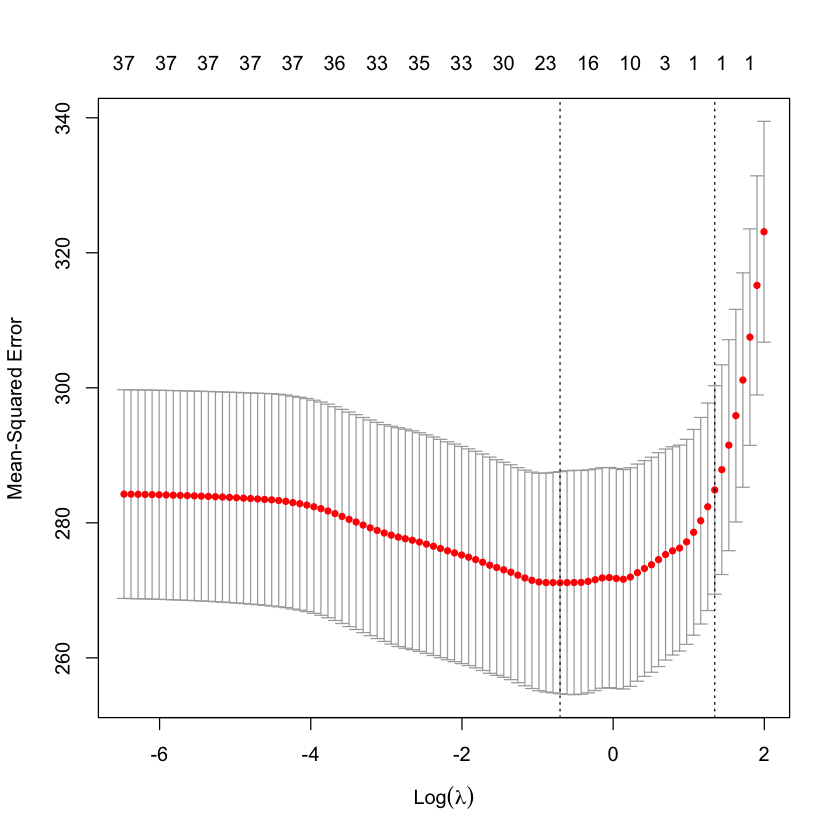

In [14]:
### LASSO selection ###

## Perform cross validation to choose lambda ##
# set.seed(1002656486)

# resid <- rstudent(lm(small.nhanes$BPSysAve~., data = small.nhanes[, -c(1)]))

# cv.out <- cv.glmnet(x = data.matrix(train[, -c(1)]), y = train$BPSysAve, standardize = T, alpha = 1)

cv.out <- cv.glmnet(x = model.matrix(~ ., data = train[,-c(1, 12)]), y = train$BPSysAve, standardize = T, alpha = 1)
plot(cv.out)
best.lambda <- cv.out$lambda.1se
best.lambda
co<-coef(cv.out, s = "lambda.1se")


In [15]:
## threfvshold for variable selection ##
# lasso 

thresh <- 0.00
# select variables #
inds<-which(abs(co) > thresh )
variables<-row.names(co)[inds]
sel.var.lasso<-variables[!(variables %in% '(Intercept)')]
sel.var.lasso

[1] "Age"

In [16]:
### Cross Validation and prediction performance of AIC based selection ###
ols.aic <- ols(BPSysAve ~ ., data = train[,which(colnames(train) %in% c(sel.var.aic, "BPSysAve"))], 
               x=T, y=T, model = T)

## 10 fold cross validation ##    
aic.cross <- calibrate(ols.aic, method = "crossvalidation", B = 10)
## Calibration plot ##
pdf("aic_cross.pdf", height = 8, width = 16)
plot(aic.cross, las = 1, xlab = "Predicted Probability", main = "Cross-Validation calibration with AIC")
dev.off()

## Test Error ##
pred.aic <- predict(ols.aic, newdata = test[,which(colnames(train) %in% c(sel.var.aic, "BPSysAve"))])
## Prediction error ##
pred.error.AIC <- mean((test$BPSysAve - pred.aic)^2)


n=400   Mean absolute error=0.603   Mean squared error=0.73862
0.9 Quantile of absolute error=0.923



pdf 
  2

In [17]:

### Cross Validation and prediction performance of BIC based selection ###
ols.bic <- ols(BPSysAve ~ ., data = train[,which(colnames(train) %in% c(sel.var.bic, "BPSysAve"))], 
               x=T, y=T, model = T)

## 10 fold cross validation ##    
bic.cross <- calibrate(ols.bic, method = "crossvalidation", B = 10)
## Calibration plot ##
pdf("bic_cross.pdf", height = 8, width = 16)
plot(bic.cross, las = 1, xlab = "Predicted Probability", main = "Cross-Validation calibration with BIC")
dev.off()

## Test Error ##
pred.bic <- predict(ols.bic, newdata = test[,which(colnames(train) %in% c(sel.var.bic, "BPSysAve"))])
## Prediction error ##
pred.error.BIC <- mean((test$BPSysAve - pred.bic)^2)






# ### Cross Validation and prediction performance of lasso based selection ###
ols.lasso <- ols(BPSysAve ~ ., data = train[,which(colnames(train) %in% c(sel.var.lasso, "BPSysAve"))], 
                 x=T, y=T, model = T)


## 10 fold cross validation ##    
lasso.cross <- calibrate(ols.lasso, method = "crossvalidation", B = 10)
## Calibration plot ##
pdf("lasso_cross.pdf", height = 8, width = 16)
plot(lasso.cross, las = 1, xlab = "Predicted Probability", main = "Cross-Validation calibration with LASSO")
dev.off()

## Test Error ##
pred.lasso <- predict(ols.lasso, newdata = test[,which(colnames(train) %in% c(sel.var.lasso, "BPSysAve"))])
## Prediction error ##
pred.error.lasso <- mean((test$BPSysAve - pred.lasso)^2)

print(c(pred.error.AIC, pred.error.BIC, pred.error.lasso))
dev.off()



n=400   Mean absolute error=1.431   Mean squared error=4.00144
0.9 Quantile of absolute error=2.782



pdf 
  2


n=400   Mean absolute error=1.584   Mean squared error=6.45234
0.9 Quantile of absolute error=1.938



pdf 
  2

[1] 240.0521 245.8945 245.8945


null device 
          1